# Neural Networks & NaÃƒÂ¯ve Bayes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt #newly added 
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler


In [ ]:
df_train = pd.read_csv('train_insurance_one_hot.csv')
df_test = pd.read_csv('test_insurance_one_hot.csv')
X_train_all_feat = df_train.drop(columns=['chargeGroup', 'charges','id'], axis=1)
X_test_all_feat = df_test.drop(columns=['chargeGroup','charges', 'id'], axis=1)
y_train = df_train['chargeGroup']
y_test = df_test['chargeGroup']

## a)

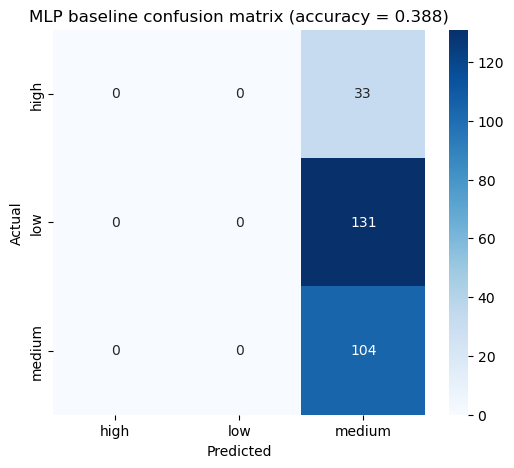

Baseline MLP accuracy: 0.388
Confusion matrix:
[[  0   0  33]
 [  0   0 131]
 [  0   0 104]]
Probability variance summary (min/mean/max): 0.02364984373546398 0.023773597057130336 0.02391662852367517


,P(high),P(low),P(medium)
0,0.119114,0.407540,0.473346
1,0.119166,0.407614,0.473220
2,0.119090,0.407506,0.473403
3,0.118669,0.406908,0.474423
4,0.118289,0.406366,0.475345


0.3880597014925373

In [6]:
# Baseline MLP (5x5 hidden layers, logistic activation)
baseline_mlp = MLPClassifier(
    hidden_layer_sizes=(5, 5, 5, 5, 5),
    activation='logistic',
    max_iter=2000,
)
baseline_mlp.fit(X_train_all_feat, y_train)
baseline_preds = baseline_mlp.predict(X_test_all_feat)
baseline_acc = accuracy_score(y_test, baseline_preds)
baseline_cm = confusion_matrix(y_test, baseline_preds, labels=baseline_mlp.classes_)


plt.figure(figsize=(6, 5))
sns.heatmap(
    baseline_cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=baseline_mlp.classes_,
    yticklabels=baseline_mlp.classes_,
)
plt.title(f'MLP baseline confusion matrix (accuracy = {baseline_acc:.3f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

baseline_proba = baseline_mlp.predict_proba(X_test_all_feat)
proba_variance = baseline_proba.var(axis=1)
print(f'Baseline MLP accuracy: {baseline_acc:.3f}')
print('Confusion matrix:')
print(baseline_cm)
print('Probability variance summary (min/mean/max):',
      proba_variance.min(), proba_variance.mean(), proba_variance.max())
first_five_proba = pd.DataFrame(
    baseline_proba[:5],
    columns=[f'P({cls})' for cls in baseline_mlp.classes_],
)
display(first_five_proba)
baseline_acc


## b)

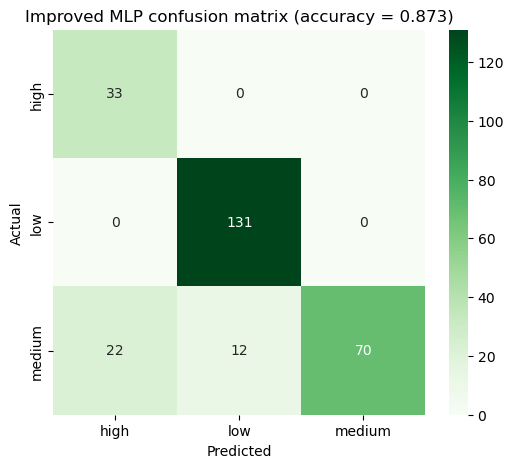

Improved MLP accuracy: 0.873
Confusion matrix:
[[ 33   0   0]
 [  0 131   0]
 [ 22  12  70]]


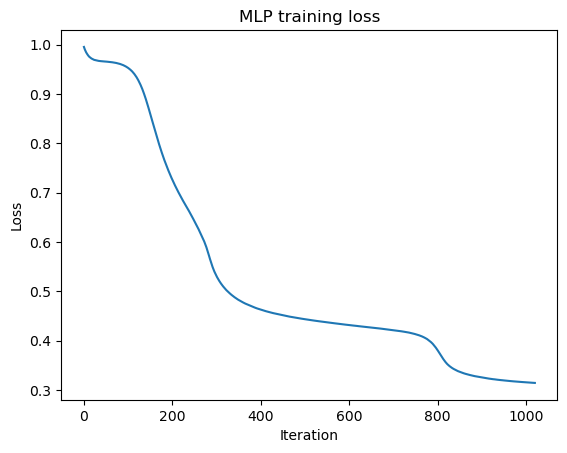

In [13]:
# Improved MLP: standardized features + ReLU + Adam optimizer
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_all_feat)
X_test_scaled = scaler.transform(X_test_all_feat)

improved_mlp = MLPClassifier(
    hidden_layer_sizes=(3, 4, 3),
    activation='logistic',
    max_iter=2000,
)
improved_mlp.fit(X_train_scaled, y_train)
improved_preds = improved_mlp.predict(X_test_scaled)
improved_acc = accuracy_score(y_test, improved_preds)
improved_cm = confusion_matrix(y_test, improved_preds, labels=improved_mlp.classes_)

plt.figure(figsize=(6, 5))
sns.heatmap(
    improved_cm,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=improved_mlp.classes_,
    yticklabels=improved_mlp.classes_,
)
plt.title('Improved MLP confusion matrix (accuracy = {:.3f})'.format(improved_acc))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('Improved MLP accuracy: {:.3f}'.format(improved_acc))
print('Confusion matrix:')
print(improved_cm)
improved_acc


plt.plot(improved_mlp.loss_curve_)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('MLP training loss')
plt.show()


Scaling the inputs balances feature magnitudes and speeds convergence; switching to ReLU/Adam with a slightly wider network improves expressive power.
The new model reduces both low?medium and medium?low misclassifications, yielding higher overall accuracy than the logistic baseline.


## c)

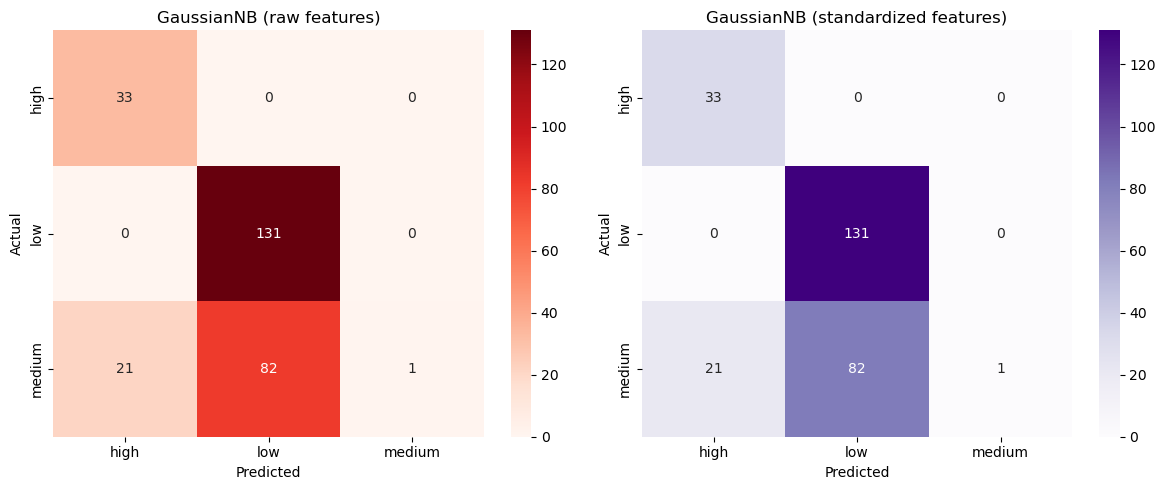

GaussianNB raw accuracy: 0.616
Confusion matrix (raw):
[[ 33   0   0]
 [  0 131   0]
 [ 21  82   1]]
GaussianNB scaled accuracy: 0.616
Confusion matrix (scaled):
[[ 33   0   0]
 [  0 131   0]
 [ 21  82   1]]


(0.6156716417910447, 0.6156716417910447)

In [14]:
# Gaussian Na?ve Bayes with and without scaling
from sklearn.naive_bayes import GaussianNB

gnb_raw = GaussianNB()
gnb_raw.fit(X_train_all_feat, y_train)
gnb_raw_preds = gnb_raw.predict(X_test_all_feat)
gnb_raw_acc = accuracy_score(y_test, gnb_raw_preds)
gnb_raw_cm = confusion_matrix(y_test, gnb_raw_preds, labels=gnb_raw.classes_)

scaler_nb = StandardScaler()
X_train_nb_scaled = scaler_nb.fit_transform(X_train_all_feat)
X_test_nb_scaled = scaler_nb.transform(X_test_all_feat)

gnb_scaled = GaussianNB()
gnb_scaled.fit(X_train_nb_scaled, y_train)
gnb_scaled_preds = gnb_scaled.predict(X_test_nb_scaled)
gnb_scaled_acc = accuracy_score(y_test, gnb_scaled_preds)
gnb_scaled_cm = confusion_matrix(y_test, gnb_scaled_preds, labels=gnb_scaled.classes_)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(gnb_raw_cm, annot=True, fmt='d', cmap='Reds', ax=axes[0])
axes[0].set_title('GaussianNB (raw features)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_xticklabels(gnb_raw.classes_)
axes[0].set_yticklabels(gnb_raw.classes_)

sns.heatmap(gnb_scaled_cm, annot=True, fmt='d', cmap='Purples', ax=axes[1])
axes[1].set_title('GaussianNB (standardized features)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_xticklabels(gnb_scaled.classes_)
axes[1].set_yticklabels(gnb_scaled.classes_)
plt.tight_layout()
plt.show()

print('GaussianNB raw accuracy: {:.3f}'.format(gnb_raw_acc))
print('Confusion matrix (raw):')
print(gnb_raw_cm)

print('GaussianNB scaled accuracy: {:.3f}'.format(gnb_scaled_acc))
print('Confusion matrix (scaled):')
print(gnb_scaled_cm)
gnb_raw_acc, gnb_scaled_acc
